In [3]:
import RNN_model_class
import helper_fct

data_params={
    "ticker":'BTC-USD',
    "interval":'1m',
    "num_days":3,
    "seq_length":60,
    "predict_length":1,
    "target_column": 'Close'}

model_params = {
    "features":['Open', 'High', 'Low', 'Volume', 'Close'],
    "input_size":5,
    "hidden_size":50,
    "num_layers":2,
    "output_size":1,
    "model_name": 'RNN_21.07.2024__23.58'}


train_params ={"lr":0.001,
               "num_epochs":100}

params = {}
params['data_params'] = data_params
params['model_params'] = model_params
params['train_params'] = train_params

model = None
scaler_X = None
scaler_Y = None

#RNN_model = RNN_model_class.RNN_model(params, model, scaler_X, scaler_Y)
#model, scaler_X, scaler_Y, train_loss, test_loss = RNN_model.train_model()

In [1]:
import RNN_model_class
import helper_fct
import pandas as pd




model_names = ['RNN_21.07.2024__23.58', 'RNN_22.07.2024__11.20']
ticker  = 'BTC-USD'
data = helper_fct.get_predict_data(ticker=ticker, interval='1m', seq_length=60)
plot_data = data['Close'].reset_index()
plot_data['Datetime'] = pd.to_datetime(plot_data['Datetime'])




    all_preds={}


In [44]:
all_preds={}

In [ ]:
    
for name in model_names:

    params, model, scaler_X, scaler_Y = helper_fct.load_model(ticker,name)
    model = RNN_model_class.RNN_model( params = params,
                                             model= model,
                                             scaler_X= scaler_X,
                                             scaler_Y= scaler_Y )

    prediction = model.predict(ticker, data)
    
    df = pd.DataFrame({'Datetime': prediction['Datetime'], name:  prediction['Value']})
    df['Datetime'] = pd.to_datetime(df['Datetime'])

    plot_data = pd.merge(plot_data, df, on="Datetime", how='outer')


plot_data


In [53]:
import pandas as pd
import os
from sklearn.metrics import mean_squared_error as MSE

# set up path for model DB
MODEL_DB_DIR =r"C:\Users\phili\OneDrive\Projekte\Code\GitHub\timeseries_forcast_in_finance_MLops\Model_DB"

df = pd.DataFrame()
model_names = ['RNN_25.07.2024__18.15', 'RNN_30.07.2024__23.08']
ticker  = 'BTC-USD'
data = helper_fct.get_predict_data( ticker = params['data_params']['ticker'],
                                        interval = params['data_params']['interval'],
                                        seq_length =params['data_params']['seq_length'] )
    
# Load and prepare the data
plot_data = data['Close'].reset_index()
plot_data['Datetime'] = pd.to_datetime(plot_data['Datetime'])
ticker_dir = os.path.join(MODEL_DB_DIR,ticker)

for name in model_names:
        if all_preds=={}:
            all_preds ={'Datetime' : [],'Prediction': [],'Model_name' : []}

        params, model, scaler_X, scaler_Y = helper_fct.load_model(ticker,name,ticker_dir)
        model = RNN_model_class.RNN_model( params = params,
                                                    model= model,
                                                    scaler_X= scaler_X,
                                                    scaler_Y= scaler_Y )

        prediction = model.predict( data)
        print(prediction)
        all_preds['Datetime'].append(prediction['Datetime'])
        all_preds['Prediction'].append(prediction['Prediction'])
        all_preds['Model_name'].append(name)

        df = pd.DataFrame(all_preds)
        df = df.drop_duplicates(subset=['Datetime', 'Model_name'])

# refactor df so that it has the structure:
# Datetime      Model_name_A            Model_name_B
# date          prediction_model A      prediction_model B                       
        pivoted_df = df.pivot(index='Datetime', columns='Model_name', values='Prediction').reset_index()
        df_final = pd.merge(pivoted_df, plot_data, on="Datetime", how='outer').sort_values(by='Datetime').reset_index(drop=True)
        df_mse = df_final.dropna()
        print(df_mse )
        if df_mse.empty:
            print("EMPTY")
        else :
            mse  = MSE(df_mse['Close'],df_mse['RNN_25.07.2024__18.15'])
            mse

{'Datetime': Timestamp('2024-08-01 08:44:00+0000', tz='UTC'), 'Prediction': 64377.81}
{'Datetime': Timestamp('2024-08-01 08:44:00+0000', tz='UTC'), 'Prediction': 64151.332}
                    Datetime  RNN_25.07.2024__18.15  RNN_30.07.2024__23.08  \
59 2024-08-01 08:41:00+00:00           64342.652344            64126.09375   

           Close  
59  64494.058594  


c:\Users\phili\OneDrive\Projekte\Code\GitHub\timeseries_forcast_in_finance_MLops\RNN_model_class.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[features.columns] = self.scaler_X.transform(features[features.columns])
c:\Users\phili\OneDrive\Projekte\Code\GitHub\timeseries_forcast_in_finance_MLops\RNN_model_class.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[features.columns] = self.scaler_X.transform(features[features.columns])


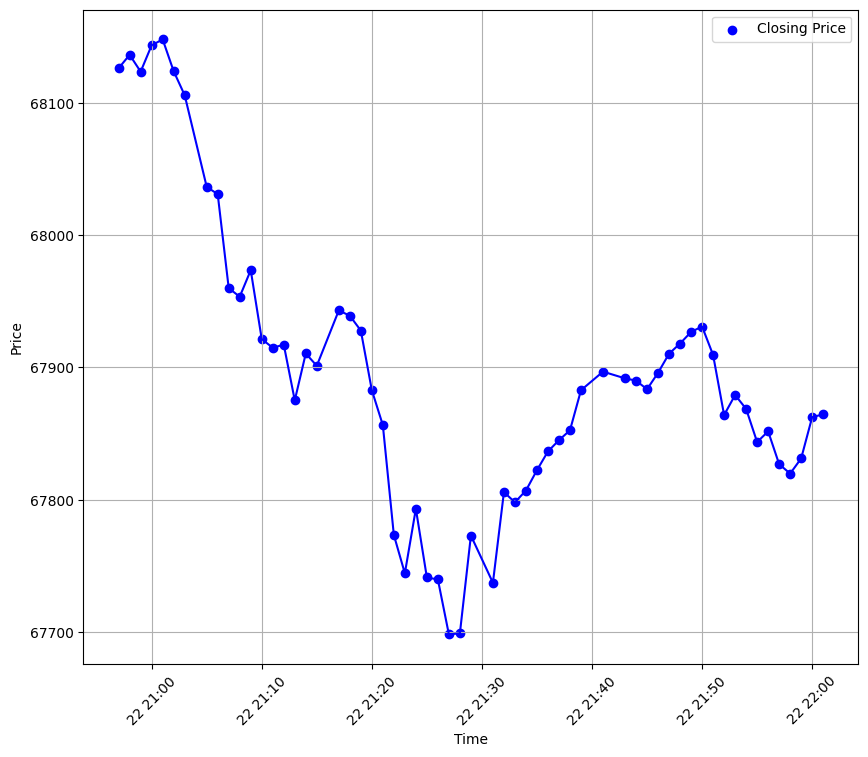

In [11]:
import helper_fct
import pandas as pd
ticker = 'BTC-USD'
modelNames = []
all_preds={}

# load prediction data 
data = helper_fct.get_predict_data(ticker=ticker, interval='1m', seq_length=60)

plot_data = data['Close'].reset_index()
plot_data['Datetime'] = pd.to_datetime(plot_data['Datetime'])

# Iitialize all_preds if empty
if all_preds =={}:
    all_preds = {'Datetime': [], 'Prediction': [], 'Model_name': []}

for name in modelNames :
    params, model, scaler_X, scaler_Y = helper_fct.load_model(ticker, name)
    model = RNN_model_class.RNN_model(params=params, model=model, scaler_X=scaler_X, scaler_Y=scaler_Y)
    prediction = model.predict(ticker, data)
    all_preds['Datetime'].append(prediction['Datetime'])
    all_preds['Prediction'].append(prediction['Prediction'])
    all_preds['Model_name'].append(name)

df = pd.DataFrame(all_preds)
df = df.drop_duplicates(subset=['Datetime', 'Model_name'])

# Refactor df so that it has the desired structure
pivoted_df = df.pivot(index='Datetime', columns='Model_name', values='Prediction').reset_index()
plot_data = pd.merge(pivoted_df, plot_data, on="Datetime", how='outer').sort_values(by='Datetime').reset_index(drop=True)


plot_predictions(plot_data, modelNames)  


def plot_predictions(plot_data, model_names):
   
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 8.5)

    ax.scatter(plot_data['Datetime'], plot_data['Close'], label='Closing Price', color='blue')
    ax.plot(plot_data['Datetime'], plot_data['Close'], color='blue')


    if model_names:
        for name in model_names:
            ax.scatter(plot_data['Datetime'], plot_data[name], label=name)
            ax.plot(plot_data['Datetime'], plot_data[name])

    plt.xticks(rotation=45)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)


    plt.savefig("plot_test.png")

 

In [ ]:
def get_mae(predict_df, model_name):
    model_df = predict_df['Close',model_name]
    df_final_drop = model_df.dropna().reset_index()
    # calculate mean absolute error
    if len(df_final_drop)>1:
        mae = mean_absolute_error(df_final_drop['Close'].values, df_final_drop['Prediction'].values)
    else:
        mae= None

    return model_name, mae

In [1]:
import yaml 
import RNN_model_class
ticker ='AAPL'
num_epochs=100
forecast_len =1
yaml_path = 'train_params.yaml'
with open(yaml_path, 'r') as file:
        params = yaml.safe_load(file)
params['data_params']['ticker'] = ticker
params['train_params']['num_epochs'] = num_epochs
params['model_params']['output_size'] = forecast_len

model = None
scaler_X = None
scaler_Y = None
    
RNN_model = RNN_model_class.RNN_model(params, model, scaler_X, scaler_Y)
model, scaler_X, scaler_Y, train_results,params, model_name = RNN_model.train_model()



[*********************100%%**********************]  1 of 1 completed
c:\Users\phili\OneDrive\Projekte\Code\GitHub\timeseries_forcast_in_finance_MLops\RNN_model_class.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns]= scaler_X.transform(df[df.columns])


Epoch [10/100], Train_Loss: 0.0272
Epoch [10/100], Test_Loss: 0.0084
Epoch [20/100], Train_Loss: 0.0114
Epoch [20/100], Test_Loss: 0.0026
Epoch [30/100], Train_Loss: 0.0027
Epoch [30/100], Test_Loss: 0.0017
Epoch [40/100], Train_Loss: 0.0028
Epoch [40/100], Test_Loss: 0.0032
Epoch [50/100], Train_Loss: 0.0026
Epoch [50/100], Test_Loss: 0.0012
Epoch [60/100], Train_Loss: 0.0022
Epoch [60/100], Test_Loss: 0.0015
Epoch [70/100], Train_Loss: 0.0022
Epoch [70/100], Test_Loss: 0.0016
Epoch [80/100], Train_Loss: 0.0021
Epoch [80/100], Test_Loss: 0.0013
Epoch [90/100], Train_Loss: 0.0021
Epoch [90/100], Test_Loss: 0.0013
Epoch [100/100], Train_Loss: 0.0021
Epoch [100/100], Test_Loss: 0.0014


In [3]:
import helper_fct
data = helper_fct.get_predict_data(ticker='AAPL', interval='5m', seq_length=80)

#print(data)
result = RNN_model.predict( data_df=data)
print(result)

{'Datetime': Timestamp('2024-07-22 15:56:00-0400', tz='America/New_York'), 'Prediction': 223.69516}


c:\Users\phili\OneDrive\Projekte\Code\GitHub\timeseries_forcast_in_finance_MLops\RNN_model_class.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[features.columns] = self.scaler_X.transform(features[features.columns])


In [6]:
import helper_fct
        # create model name 
        model_name=f"RNN_{dt.datetime.now().strftime('%d.%m.%Y__%H.%M')}"

        base_directory = f"models/{self.data_params['ticker']}"
        os.makedirs(base_directory, exist_ok=True)

        # Save the model and scalers
        model_name=f"RNN_{dt.datetime.now().strftime('%d.%m.%Y__%H.%M')}"


        self.model_params['model_name'] = model_name

        models_directory=os.path.join(base_directory,model_name)
        os.makedirs(models_directory, exist_ok=True)
        
        
        with open(f"{models_directory}/model.pkl", 'wb') as f:
            pickle.dump(model, f)
        
        with open(f"{models_directory}/scaler_X.pkl", 'wb') as f:
            pickle.dump(scaler_X, f)
        
        with open(f"{models_directory}/scaler_Y.pkl", 'wb') as f:
            pickle.dump(scaler_Y, f)


        # Save training parameters to YAML
        params = {
            'data_params': self.data_params,
            'model_params': self.model_params,
            'train_params': self.train_params
        }
        yaml_filename = f"{models_directory}/params.yaml"
        with open(yaml_filename, 'w') as f:
            yaml.dump(params, f)

        self.model = model
        self.scaler_X = scaler_X
        self.scaler_Y =scaler_Y

{'current time': Timestamp('2024-07-22 15:59:00-0400', tz='America/New_York'), 'predict time': Timestamp('2024-07-22 16:00:00-0400', tz='America/New_York'), 'all_prediction': array([[223.56259]], dtype=float32), 'new_prediction': 223.56259}


c:\Users\phili\OneDrive\Projekte\Code\GitHub\timeseries_forcast_in_finance_MLops\RNN_model_class.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[features.columns] = self.scaler_X.transform(features[features.columns])


In [9]:
import yfinance as yf
seq_length = 60
ticker = 'AAPL'
interval = '1m'
stock = yf.Ticker(ticker)

# Define the period to fetch enough data points
interval_to_period = {
            '1m': '1d',
            '5m': '5d',
            '15m': '10d',
            '1h': '60d',
            '1d': 'max'
                }
period = interval_to_period.get(interval, '1d')  # Default to '1d' if interval not found

# Fetch historical data
data = stock.history(period=period, interval=interval)
        # Get the last x candles
last_x_candles = data.tail(seq_length)
last_x_candles

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-07-24 15:00:00-04:00,218.169998,218.229996,218.072800,218.110001,88091,0.0,0.0
2024-07-24 15:01:00-04:00,218.113998,218.119995,217.960297,218.093704,58435,0.0,0.0
2024-07-24 15:02:00-04:00,218.093201,218.199997,218.070007,218.093506,87016,0.0,0.0
2024-07-24 15:03:00-04:00,218.089996,218.149994,218.040100,218.050705,40397,0.0,0.0
2024-07-24 15:04:00-04:00,218.070007,218.139999,218.059998,218.104996,43381,0.0,0.0
2024-07-24 15:05:00-04:00,218.110001,218.190002,218.011200,218.080002,69682,0.0,0.0
2024-07-24 15:06:00-04:00,218.074997,218.119995,218.021393,218.065002,48571,0.0,0.0
2024-07-24 15:07:00-04:00,218.070007,218.089996,217.970001,218.020004,76959,0.0,0.0
2024-07-24 15:08:00-04:00,218.020004,218.057693,217.960007,217.994995,69535,0.0,0.0
